# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('dataset_clustering.csv')
df.head()

,remote_ratio,job_title,Cluster
0,0.5,0.000000,1
1,0.0,0.482904,4
2,0.0,0.482904,4
3,0.0,0.081637,0
4,0.0,0.081637,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((35395, 2), (8849, 2))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Decision Tree
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### Penjelasan Algoritma

Saya pertama kali menggunakan algoritma **Random Forest Classifier**, yang merupakan salah satu metode ensemble learning. Algoritma ini terdiri dari kumpulan decision tree yang dilatih menggunakan data secara acak (bootstrap sampling), kemudian hasil prediksinya ditentukan melalui mekanisme voting (untuk klasifikasi) atau rata-rata (untuk regresi).

Saya memilih algoritma ini karena lebih stabil dan tahan terhadap overfitting dibandingkan decision tree tunggal. Selain itu, Random Forest juga tidak terlalu sensitif terhadap skala data, meskipun dalam kasus ini, data yang digunakan telah melalui proses standardisasi.

Algoritma kedua yang saya gunakan adalah **Logistic Regression**, yang merupakan metode klasifikasi berbasis regresi dengan fungsi aktivasi sigmoid untuk memetakan probabilitas suatu kelas. Algoritma ini sangat memperhatikan skala data, sehingga cocok digunakan pada dataset yang telah melalui proses standardisasi.

Saya memilih Logistic Regression dengan harapan bahwa model ini dapat bekerja lebih optimal pada data yang telah distandarisasi. Selain itu, algoritma ini memiliki interpretabilitas yang baik, memungkinkan analisis kontribusi masing-masing fitur terhadap keputusan klasifikasi. Logistic Regression juga cenderung lebih sederhana dan efisien dibandingkan algoritma berbasis pohon keputusan, sehingga dapat menjadi pembanding yang baik dalam evaluasi performa model.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [5]:
# Evaluasi menggunakan classification report
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      1084
           2       1.00      1.00      1.00      2027
           3       1.00      1.00      1.00      1211
           4       1.00      1.00      1.00      1543

    accuracy                           1.00      8849
   macro avg       1.00      1.00      1.00      8849
weighted avg       1.00      1.00      1.00      8849



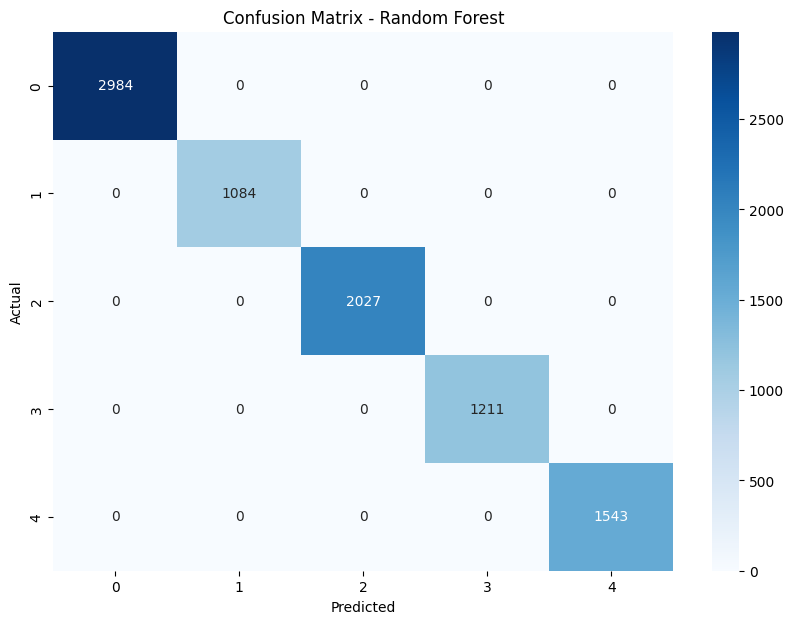

In [6]:


# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      1084
           2       1.00      1.00      1.00      2027
           3       1.00      1.00      1.00      1211
           4       1.00      1.00      1.00      1543

    accuracy                           1.00      8849
   macro avg       1.00      1.00      1.00      8849
weighted avg       1.00      1.00      1.00      8849



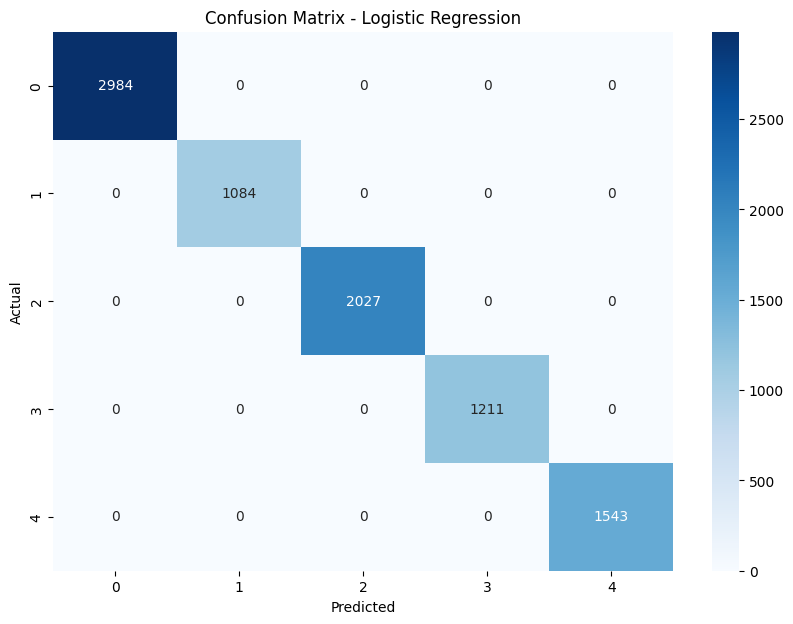

In [8]:


# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan confusion matrix yang ditampilkan untuk algoritma **Random Forest** dan **Logistic Regression**, berikut adalah evaluasi serta perbandingan kinerjanya:

### **1. Random Forest**
- Akurasi tinggi dengan prediksi yang sangat baik di semua kelas.
- Dalam Classification Report, di seluruh metric mencapai 100% (F1,Recall,Precission dan Accuracy)

### **2. Logistic Regression**
- Performa lebih baik dengan jumlah kesalahan yang lebih sedikit dibandingkan Random Forest
- Dalam Classification Report, di seluruh metric mencapai 100% (F1,Recall,Precission dan Accuracy)
- Pada LR, ada perbedaan kecil dalam distribusi dan jumlah kesalahan,



#### **Kesimpulan**  
Dari segi akurasi F1 recall dan precission, kedua model memiliki performa yang hampir identik.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

Tuning tidak saya lakukan karena hasil akurasi sudah maksimal

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Hasil Evaluasi Model Klasifikasi

Berdasarkan confusion matrix, kedua model memiliki jumlah kesalahan yang sama, sehingga performa akurasi mereka identik. Namun, distribusi dan jumlah keselahan yang sedikit berbeda

## Identifikasi Kelemahan Model
### Precision dan Recall Rendah untuk Kelas Tertentu
- Melihat confussion matrix yang sempurna bisa dikatakan tidak ada nilai precision dan recall rendah untuk kelas tertentu di kedua model



### Model mengalami overfitting atau underfitting?
Berdasarkan Classification Report, Hasil keseluruhan metrics pada data test mencapai hasil maksimal, yaitu 100%, hal ini menunjukan tidak adanya overfitting atau underfitting, tetapi akurasi yang maksimal itu bisa tetap menjadi indikasi potensi overfitting jika model hanya bekerja sempurna pada data uji tetapi tidak diuji lebih lanjut pada data yang benar-benar baru atau distribusi yang berbeda.

Meskipun hasil 100% pada data uji mengindikasikan model sangat baik dalam mengklasifikasikan data tersebut, ada beberapa kemungkinan yang perlu dipertimbangkan:

- Data Leakage – Jika ada kebocoran data dari pelatihan ke pengujian, model bisa terlihat "sempurna" tanpa benar-benar memiliki generalisasi yang baik.

- Model Sederhana tetapi Sesuai – Jika dataset memiliki pola yang sangat jelas dan model cukup sederhana, maka akurasi tinggi memang bisa terjadi tanpa overfitting.

Jika model tetap menunjukkan 100% akurasi setelah pengujian lebih lanjut, maka kemungkinan besar dataset memang sangat mudah dipelajari, bukan karena overfitting. Namun, jika performanya menurun pada data baru, maka ada indikasi bahwa model mengalami overfitting dan perlu disesuaikan.


### Rekomendasi Tindakan Lanjutan

Melihat metric yang maksimal, ntuk memastikan model tidak overfitting, beberapa langkah bisa dilakukan:

- Uji dengan Data Baru (Unseen Data), Gunakan dataset berbeda yang tidak digunakan dalam proses pelatihan atau validasi.
- Cross-validation – Menggunakan k-fold cross-validation untuk melihat apakah model tetap memiliki performa yang stabil di berbagai subset data.
- Evaluasi pada Data dengan Noise, Tambahkan sedikit noise pada data uji untuk melihat apakah model tetap bekerja dengan baik.
- Periksa Distribusi Data Latih vs. Data Uji, Pastikan data uji tidak terlalu mirip dengan data latih hingga model hanya “mengingat” tanpa memahami pola sebenarnya.